# Rejection sampling

This is a fairly simple sampling method which can be performed with a few steps:

- We define the distribution to sample from as $f(x)$ where $x$ is location to sample from.
- We also define a proposal distribution $Y$ with the function $g(x)$.
- In this example we choose a mixed normal distribution $g = \mathcal{N}(6, \mu = 9)$ as proposal distribution to sample from the target distribution $f = 0.2 * \mathcal{N}(6, 0.8) + 0.8 * \mathcal{N}(10, 1.5)$.
- We also select a scaling constant $M$ which in our case is 1.

Iterate this for each sample:
- Set $x$ as a random sample from the proposal distribution $g$ 
- If $\frac{f(x)}{M * g(x)} > unif[0,1]$:
  - Accept sample and save it to sampled points.

In [32]:
import math
def normal_dist(x, sig=0.5, mu=1):
    return (1/math.sqrt(2*math.pi*sig**2)) * math.exp(-(x - mu)**2/(2*sig**2))
def mixed_normal(x):
    return normal_dist(x, sig=0.8, mu=6) * 0.2 + normal_dist(x, sig=1.5, mu=10) * 0.8

In [37]:
#Sampling methods
import numpy as np

def rejection_sampling(dist, length=100):
    mu = 9
    sig = 5
    M = 1
    samples = []

    for i in range(length):
        x_n = np.random.normal(mu, sig, size=1)
        if (dist(x_n)/(M*normal_dist(x_n, sig=sig, mu=mu))) > np.random.uniform(0,1,1):
            samples.append(x_n)
            x = x_n

    return samples

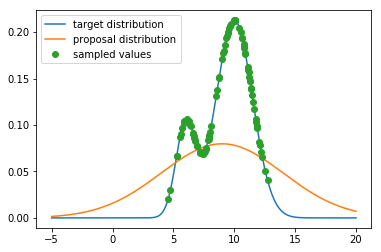

In [39]:
import matplotlib.pyplot as plt

r = (-5, 20)
plt.plot(np.linspace(r[0], r[1], 1000), [mixed_normal(s) for s in np.linspace(r[0], r[1], 1000)], label='target distribution')
plt.plot(np.linspace(r[0], r[1], 1000), [normal_dist(s, sig=5, mu=9) for s in np.linspace(r[0], r[1], 1000)], label='proposal distribution')
samples = rejection_sampling(mixed_normal, length=150)
plt.plot(samples, [mixed_normal(s) for s in samples], 'o', label='sampled values')
plt.legend()
plt.show()